In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os, sys

sys.path.append(os.path.abspath("/work/bb1018/b380873/tropic_vis/utilities/"))
from plotting_utilities import sexy_axes

In [2]:
basedir = '/work/bb1018/b380873/traj_output/'
clams_fi = xr.open_dataset( basedir + 'CLAMS-Tf_0V2M0A0R_tst00000450_trim_extract_dt_iwc.nc' )
icon_fi = xr.open_dataset( basedir + 'ICON_0V2M0A0R_tst00000450_trim_extract_dt.nc' )
clams_rhi = clams_fi['RHI']

# Use the where filter to find instances where the CLaMS RHi plummets
clams_rhi = clams_rhi.where( clams_rhi > 0 )

# ICON or CLaMS variables to look at in correspondence with problematic CLaMS RHi
#icon_qs = icon_fi['qs']*10**6  # 10**6 to convert from kg kg-1 to ppmv here
#icon_qg = icon_fi['qg']*10**6  # 10**6 to convert from kg kg-1 to ppmv here
#icon_qi = icon_fi['qi']*10**6  # 10**6 to convert from kg kg-1 to ppmv here

icon_w = icon_fi['w_v']
icon_qsedi = -1*icon_fi['qsedi']*10**6  # 10**6 to convert from kg kg-1 to ppmv here, -1 to have a magnitude
icon_qsedo = -1*icon_fi['qsedo']*10**6
#icon_qnsedi = icon_fi['qnsedi']
#icon_qnsedo = icon_fi['qnsedo']

#clams_iwc = clams_fi['qi']*10**6
#clams_iwc_pre = clams_fi['IWC_pre']*10**6
#clams_Ni = clams_fi['Ni'] * clams_fi['rho'] / 1000
#clams_T = clams_fi['T']

In [3]:
# Check if any of the values is nan and not all of the values are nan.
# i.e. There is a problematic point at which RHi becomes negative for CLaMS.
for i in np.arange(29,clams_rhi.shape[1]):
    if (xr.ufuncs.isnan( clams_rhi[:,i] ).any() & ~xr.ufuncs.isnan( clams_rhi[:,i] ).all()):
        break
print(i)

29


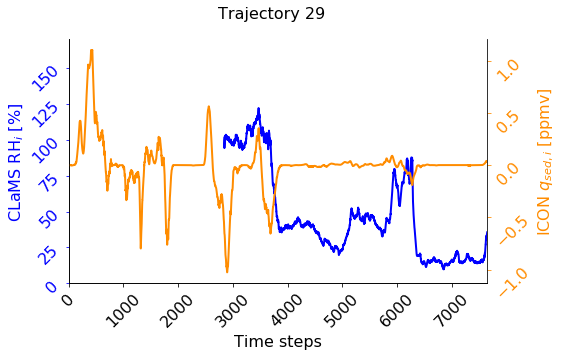

In [5]:
fs = 16
fig = plt.figure( figsize=(7.5,4.5) )
fig.suptitle( 'Trajectory ' + str(i), fontsize=fs )

snow = False
graupel = False
ice = False
sedi = True
upd = False

ax1 = plt.gca()
ax1.plot( clams_rhi[:,i], color='blue', linewidth=2 )
ax1.set_ylabel( r'CLaMS RH$_i$ [%]', fontsize=fs, color='blue' )
ax1.tick_params( axis='y', colors='blue' )
ax1.set_ylim( [0, 170] )
sexy_axes( ax1, fs )

ax2 = ax1.twinx()
#ax2.plot( clams_T[:,i], color='turquoise', linewidth=2 )
#ax2.plot( [0, 7651], [240, 240], lw=0.5, ls='--', color='k' )
#ax2.set_ylabel( r'CLaMS $T$ [K]', fontsize=fs, color='turquoise' )
#ax2.tick_params( 'both', labelsize=fs, rotation=45, colors='turquoise' )

if snow == True:
    ax2.plot( icon_qs[:,i], color='purple', linewidth=2 )
    ax2.set_ylabel( r'ICON $q_s$ [ppmv]', fontsize=fs, color='purple' )
    ax2.tick_params( 'both', labelsize=fs, rotation=45, colors='purple' )
if graupel == True:
    ax2.plot( icon_qg[:,i], color='green', linewidth=2 )
    ax2.set_ylabel( r'ICON $q_g$ [ppmv]', fontsize=fs, color='green' )
    ax2.tick_params( 'both', labelsize=fs, rotation=45, colors='green' )
if ice == True:
    ax2.plot( clams_Ni[:,i], color='maroon', linewidth=2 )
    ax2.set_ylabel( r'CLaMS $N_i$ [L$^{-1}$]', fontsize=fs, color='maroon' )
    ax2.tick_params( 'both', labelsize=fs, rotation=45, colors='maroon' )
    #ax2.plot( clams_iwc_pre[:,i], color='maroon', linewidth=2, linestyle='--' )
    #ax2.set_ylabel( r'CLaMS pre $q_i$ [ppmv]', fontsize=fs, color='maroon' )
    #ax2.tick_params( 'both', labelsize=fs, rotation=45, colors='maroon' )
    #ax2.plot( clams_iwc[:,i], color='magenta', linewidth=2, linestyle='--' )
    #ax2.set_ylabel( r'CLaMS $q_i$ [ppmv]', fontsize=fs, color='magenta' )
    #ax2.tick_params( 'both', labelsize=fs, rotation=45, colors='magenta' )
    #ax2.plot( icon_qi[:,i], color='magenta', linewidth=1.5 )
    #ax2.set_ylabel( r'ICON $q_i$ [ppmv]', fontsize=fs, color='magenta' )
    #ax2.tick_params( 'both', labelsize=fs, rotation=45, colors='magenta' )
if sedi == True:
    ax2.plot( icon_qsedi[:,i]-icon_qsedo[:,i], color='darkorange', linewidth=2 )
    ax2.set_ylabel( r'ICON $q_{sed,i}$ [ppmv]', fontsize=fs, color='darkorange' )
    ax2.tick_params( 'both', labelsize=fs, rotation=45, colors='darkorange' )
if upd == True:
    ax2.plot( icon_w[:,i], color='gold', linewidth=2 )
    ax2.set_ylabel( r'ICON $w$ [m s$^{-1}$]', fontsize=fs, color='gold' )
    ax2.tick_params( 'both', labelsize=fs, rotation=45, colors='gold' )

#ax2.set_ylim( [0, 500] )
ax2.spines['top'].set_color('none')
ax1.set_xlim( [0, 7651] )
ax2.set_xlim( [0, 7651] )
#ax1.set_xlim( [700, 900] )
#ax2.set_xlim( [700, 900] )
ax1.set_xlabel( 'Time steps', fontsize=fs )

#figdir = '/work/bb1018/b380873/tropic_vis/output/pop1/'
#fig.savefig( figdir + 'clams-RHi-icon-w-qsedinet_traj' + str(i) + '.pdf', bbox_inches='tight' )
plt.show()

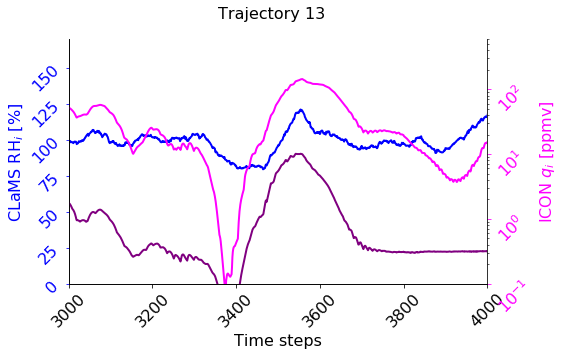

In [458]:
fs = 16
fig = plt.figure( figsize=(7.5,4.5) )
fig.suptitle( 'Trajectory ' + str(i), fontsize=fs )

snow = True
graupel = False
ice = True

ax1 = plt.gca()
ax1.plot( clams_rhi[:,i], color='blue', linewidth=2 )
ax1.set_ylabel( r'CLaMS RH$_i$ [%]', fontsize=fs, color='blue' )
ax1.tick_params( axis='y', colors='blue' )
ax1.set_ylim( [0, 170] )
sexy_axes( ax1, fs )

ax2 = ax1.twinx()
if snow == True:
    ax2.plot( icon_qs[:,i], color='purple', linewidth=2 )
    ax2.set_ylabel( r'ICON $q_s$ [ppmv]', fontsize=fs, color='purple' )
    ax2.tick_params( 'both', labelsize=fs, rotation=45, colors='purple' )
if graupel == True:
    ax2.plot( icon_qg[:,i], color='green', linewidth=2 )
    ax2.set_ylabel( r'ICON $q_g$ [ppmv]', fontsize=fs, color='green' )
    ax2.tick_params( 'both', labelsize=fs, rotation=45, colors='green' )
if ice == True:
    ax2.plot( icon_qi[:,i], color='magenta', linewidth=2 )
    ax2.set_ylabel( r'ICON $q_i$ [ppmv]', fontsize=fs, color='magenta' )
    ax2.tick_params( 'both', labelsize=fs, rotation=45, colors='magenta' )

ax2.set_ylim( [0.1, 600] )
ax2.set_yscale( 'log' )
ax2.spines['top'].set_color('none')
ax1.set_xlim( [3000, 4000] )
ax2.set_xlim( [3000, 4000] )
ax1.set_xlabel( 'Time steps', fontsize=fs )

figdir = '/work/bb1018/b380873/tropic_vis/pop3/'
fig.savefig( figdir + 'clams-RHi-icon-qsqi_traj' + str(i) + '.pdf', bbox_inches='tight' )
plt.show()